![House price](https://camo.githubusercontent.com/91682d48defd2322db208e2a75583408f6f2d5cb61b230c8a76f78d986433fff/68747470733a2f2f69302e77702e636f6d2f746865636c6576657270726f6772616d6d65722e636f6d2f77702d636f6e74656e742f75706c6f6164732f323032302f31322f4d616368696e652d4c6561726e696e672d50726f6a6563742d6f6e2d486f7573652d50726963652d50726564696374696f6e2e706e673f6669743d313238302532433732302673736c3d31)


## **Objective**
The goal of this project is to develop a machine learning model to predict house prices based on various features such as location, square footage, number of bedrooms and bathrooms, and other relevant factors. Accurate price predictions can assist buyers, sellers, and real estate professionals in making informed decisions.

## **Dataset Used**
The dataset used for this project is provided by **Datanomus Company** as part of the given problem statement. It contains structured data related to houses, including numerical and categorical features that influence pricing.

## **Data Preprocessing**
- Handling missing values
- Encoding categorical variables
- Feature scaling
- Outlier detection and removal

## **Exploratory Data Analysis (EDA)**
- Distribution of house prices
- Correlation heatmap
- Relationship between features and price

## **Model Selection**
- Linear Regression
- Neural Network

## **Evaluation Metrics**
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- R² Score


# Load And Display the Datasets

In [1]:
# Importing necessaries library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Extracting the data
df = pd.read_csv('https://raw.githubusercontent.com/fractalpriyanka/InternshipProjects/refs/heads/main/Housing%20Prices%20Dataset.csv',sep=",")

In [3]:
# Understanding data
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# Checking if there is any null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Feature Engineering

In [6]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
# df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']].apply(pd.get_dummies)
df[['mainroad','guestroom','basement','hotwaterheating','prefarea','airconditioning']] = df[['mainroad','guestroom','basement',
                                                                                             'hotwaterheating','prefarea',
                                                                                             'airconditioning']].map(lambda x: 0 if x == 'yes' else 1)

df['furnishingstatus'] = df['furnishingstatus'].apply(
    lambda x: 0 if x == 'unfurnished' else (1 if x == 'semi-furnished' else 2)
)

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Min-Max Scaling
minmax = MinMaxScaler()
df[['price','area','bedrooms','bathrooms','stories','parking']] = minmax.fit_transform(df[['price','area','bedrooms','bathrooms','stories','parking']])

In [9]:
# Log transformation for skewed data
df['price'] = np.log1p(df['price'])
df['area'] = np.log1p(df['area'])

# Exploratory Data Analysis (EDA)

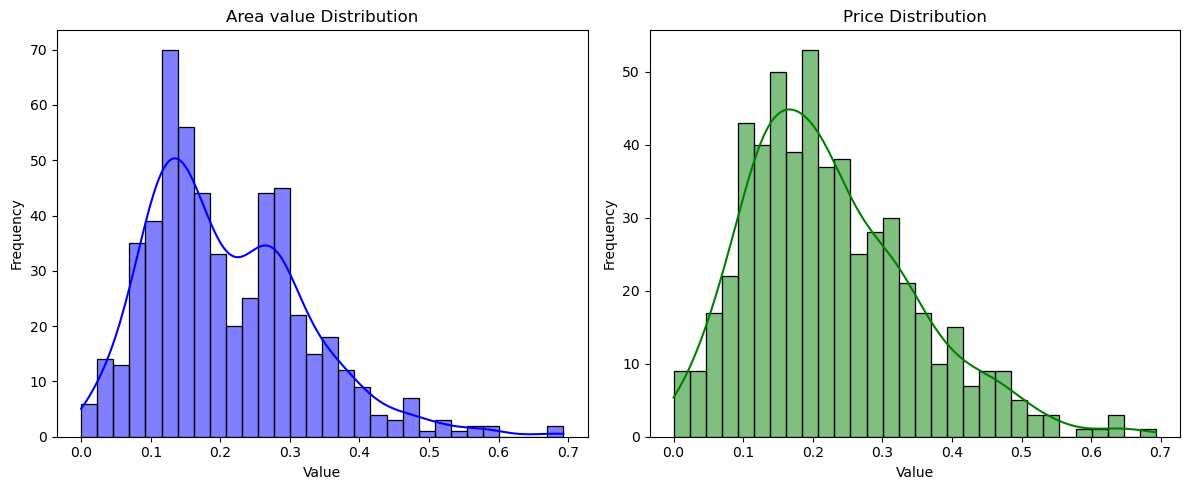

In [10]:
# 1. Histogram + KDE Plot

# Distribution of area column
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot 1: Histogram
sns.histplot(df['area'], bins=30, kde=True, color='blue', ax=axes[0])
axes[0].set_title("Area value Distribution")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")

# Distribution of price column
sns.histplot(df['price'],bins=30, kde=True, color='green', ax=axes[1])
axes[1].set_title("Price Distribution")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Frequency")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

#### Distribution of All Columns

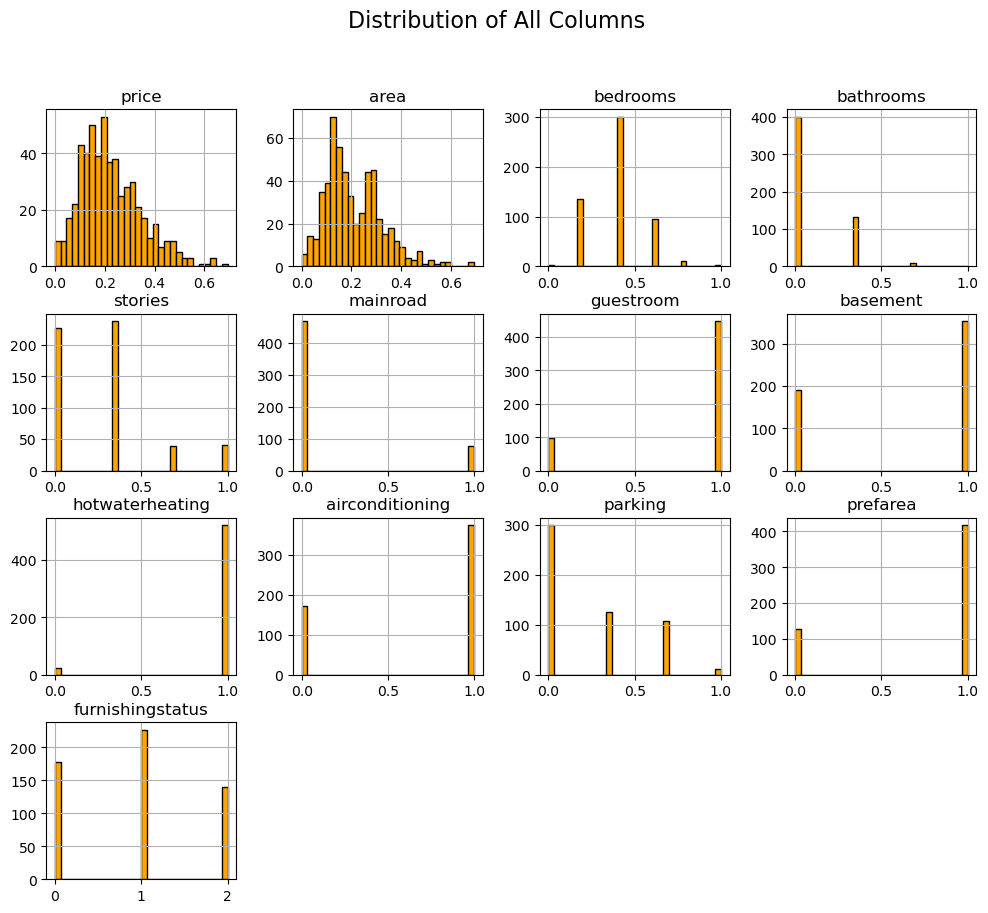

In [11]:
# Distribution of all features

# Plot histograms for all numerical columns
df.hist(figsize=(12, 10), bins=30, edgecolor='black', color = 'orange')

plt.suptitle("Distribution of All Columns", fontsize=16)
plt.show()

#### Regression plot of all feature

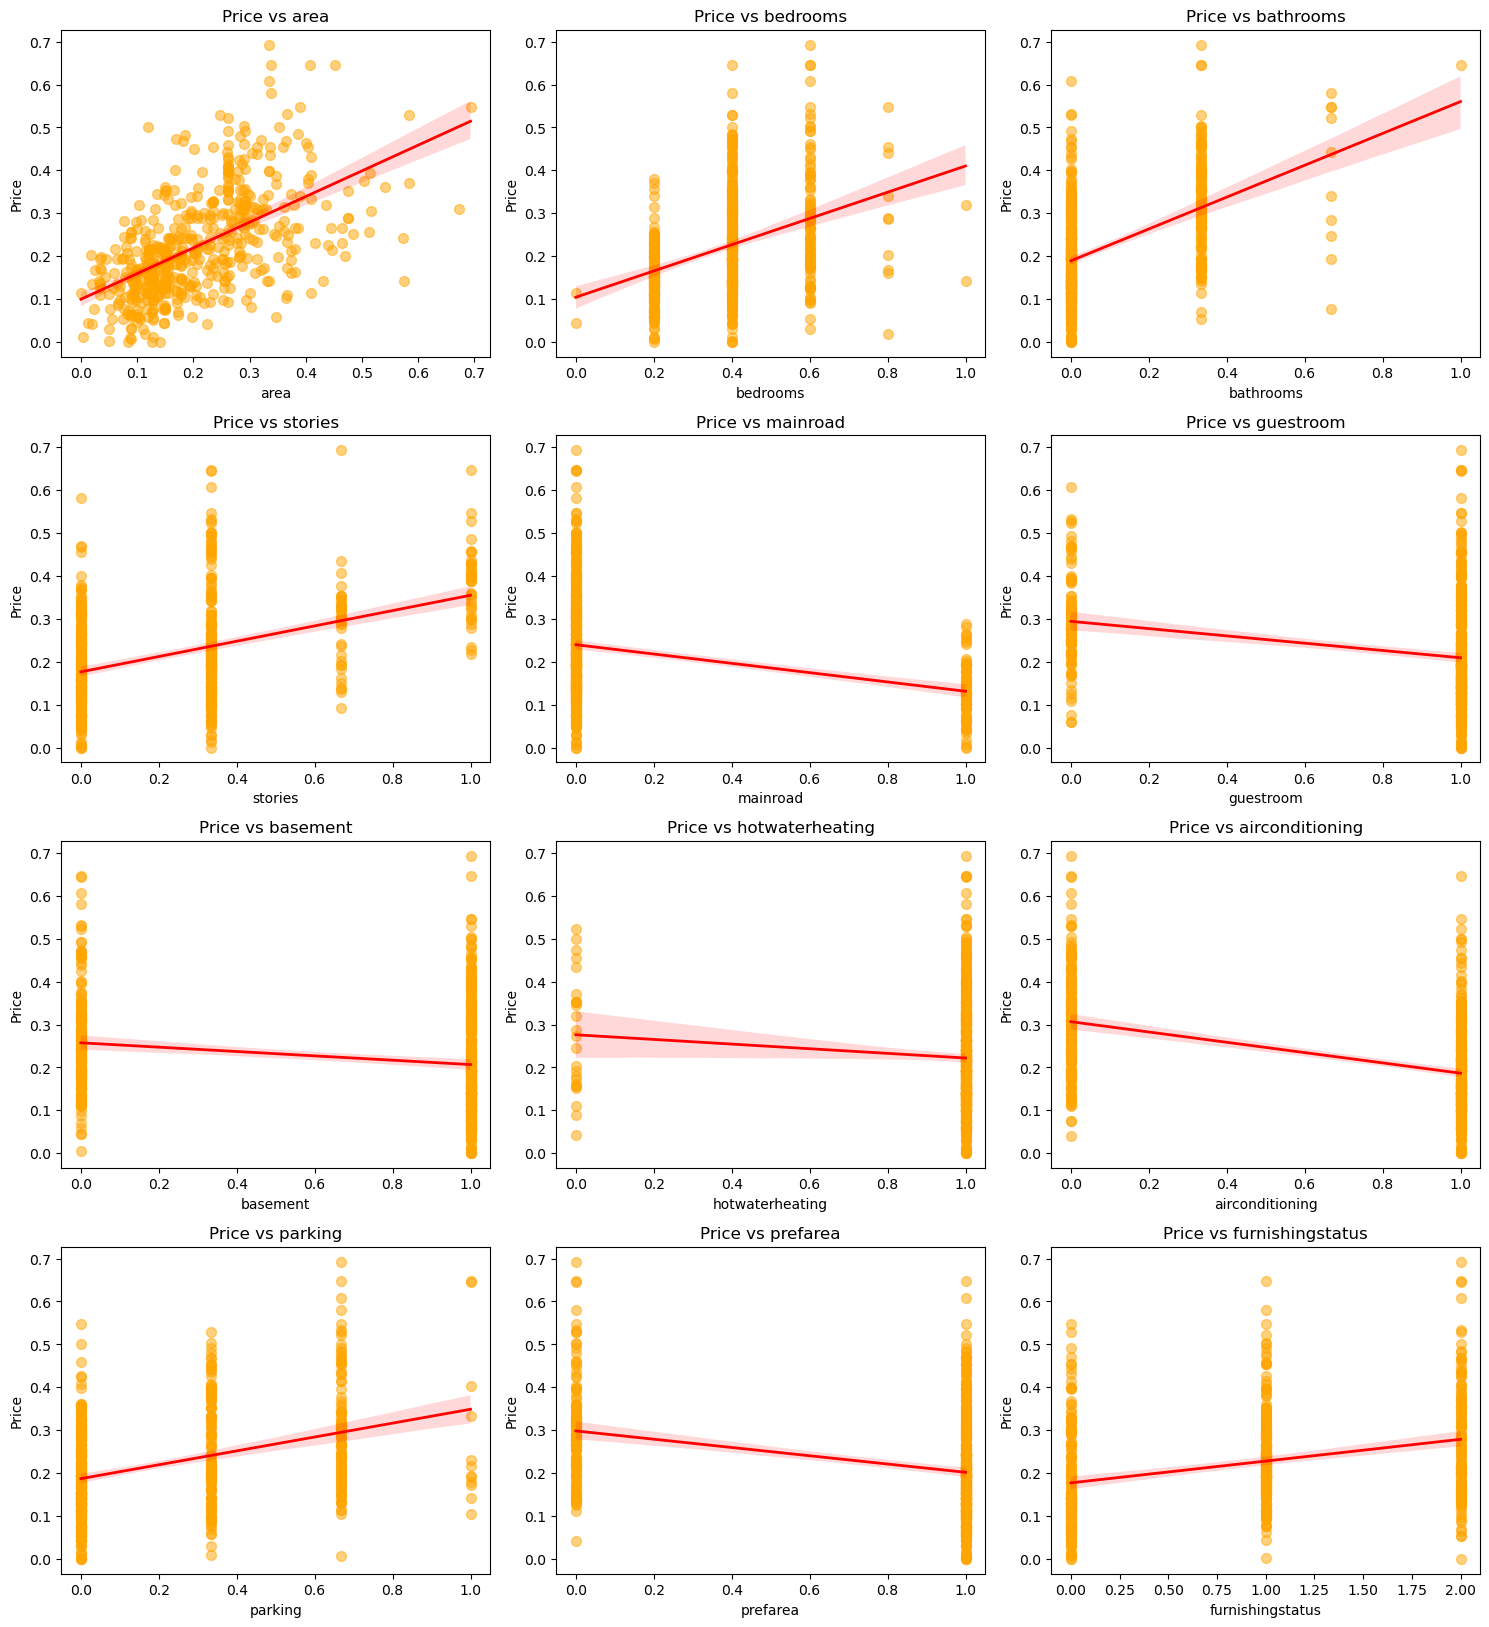

In [12]:
# Regression plot with all feature to check the correleation with house price
# Features to plot
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
            'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
            'parking', 'prefarea', 'furnishingstatus']

# Set up the figure size and layout
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Plot each feature
for i, feature in enumerate(features):
    row_ax = axes[i]  # Select the subplot axis
    g = sns.regplot(
        x=df[feature], 
        y=df['price'], 
        scatter_kws={'s': 50, 'alpha': 0.5}, 
        line_kws={'color': 'red', 'linewidth': 2},
        color='orange',
        ax=row_ax
    )
    row_ax.set_title(f'Price vs {feature}', fontsize=12)
    row_ax.set_xlabel(feature, fontsize=10)
    row_ax.set_ylabel('Price', fontsize=10)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Correleation heatmap

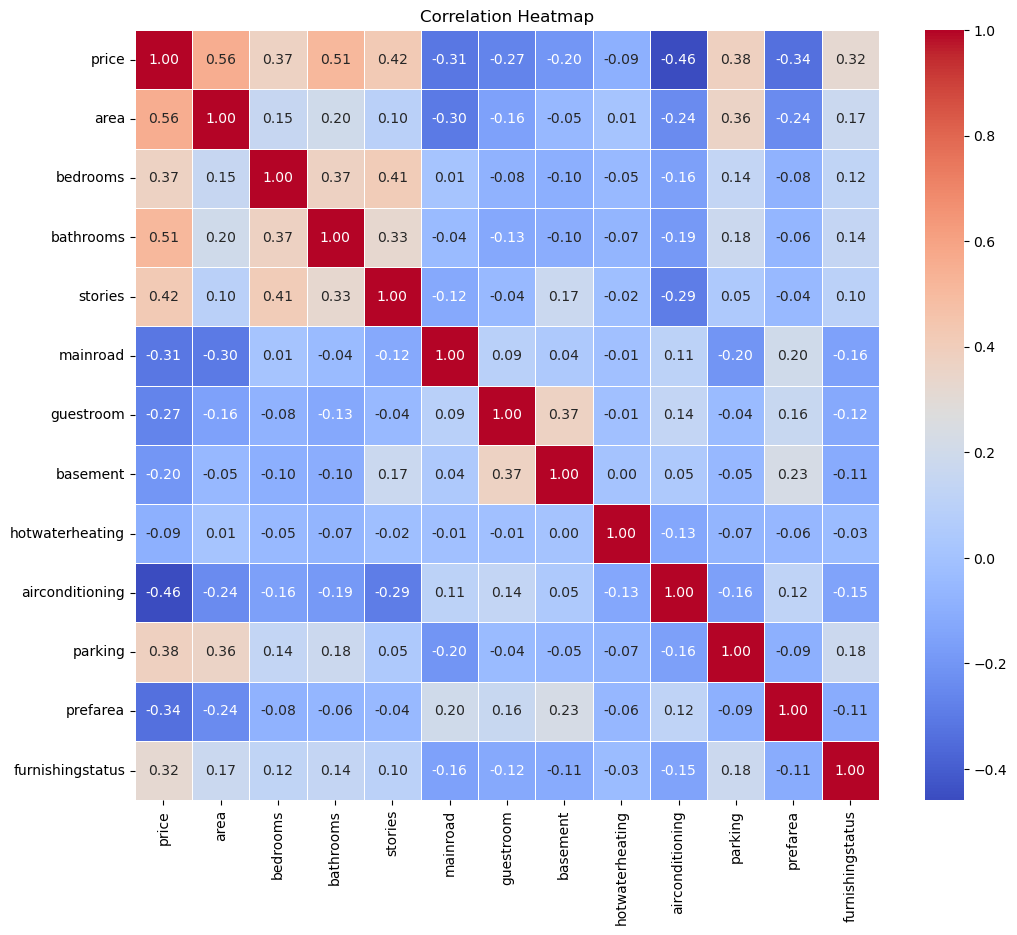

In [13]:
# Correleation matrix heatmap

import seaborn as sns
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)

# Title for the heatmap
plt.title("Correlation Heatmap")

# Show the plot
plt.show()

#### Defining the independent and target value

In [14]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['price'])
y = df['price']

#### Feature Importance

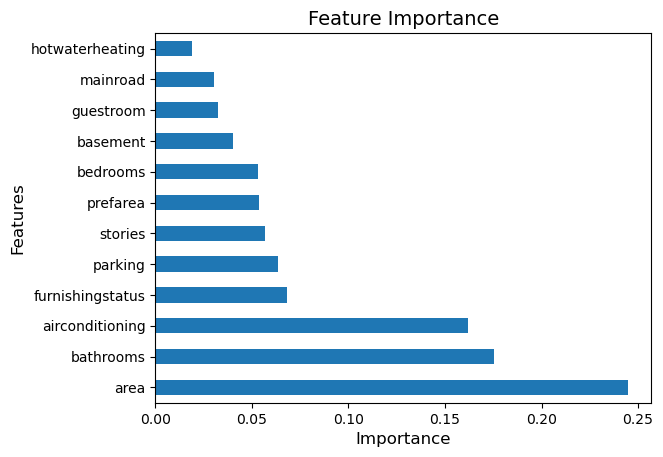

In [15]:

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

#plot graph of feature importances for better visualisation
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.title('Feature Importance', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

# Training and Testing the model

### Linear Regression model

Train Data: MAE = 0.05, RMSE = 0.06, R2 Score = 0.7035
Test Data: MAE = 0.06, RMSE = 0.08, R2 Score = 0.6695


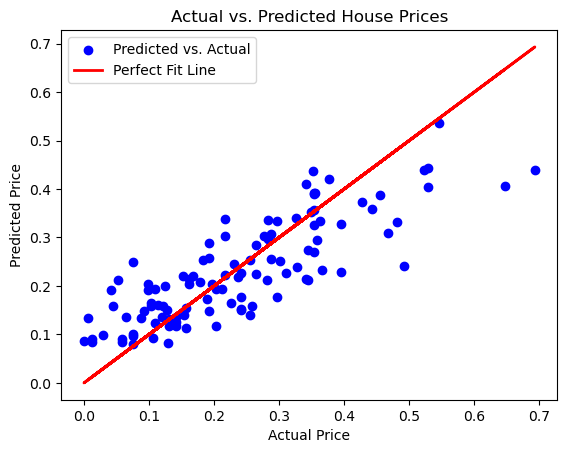

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into features (X) and target (y)
X = df.drop(columns=['price'])
y = df['price']
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)


# Predict on Train and Test Data
lr_y_train_pred = lr_model.predict(X_train)
lr_y_test_pred = lr_model.predict(X_test)

# Model Evaluation on Train Data
lr_train_mae = mean_absolute_error(y_train, lr_y_train_pred)
lr_train_rmse = np.sqrt(mean_squared_error(y_train, lr_y_train_pred))
lr_train_r2 = r2_score(y_train, lr_y_train_pred)

# Model Evaluation on Test Data
lr_test_mae = mean_absolute_error(y_test, lr_y_test_pred)
lr_test_rmse = np.sqrt(mean_squared_error(y_test, lr_y_test_pred))
lr_test_r2 = r2_score(y_test, lr_y_test_pred)

# Print Results
print(f"Train Data: MAE = {lr_train_mae:.2f}, RMSE = {lr_train_rmse:.2f}, R2 Score = {lr_train_r2:.4f}")
print(f"Test Data: MAE = {lr_test_mae:.2f}, RMSE = {lr_test_rmse:.2f}, R2 Score = {lr_test_r2:.4f}")


# 📊 Plot Real vs. Predicted Values
plt.scatter(y_test, lr_y_test_pred, color='blue', label="Predicted vs. Actual")  
plt.plot(y_test, y_test, color='red', linewidth=2, label="Perfect Fit Line")  # Ideal 45-degree line

# Labels & Title
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted House Prices")
plt.legend()
plt.show()

### Linear Regression Model after tuning

Best Hyperparameters: {'fit_intercept': True}
Train Data: MAE = 0.05, RMSE = 0.06, R2 Score = 0.6953
Test Data: MAE = 0.07, RMSE = 0.09, R2 Score = 0.6513


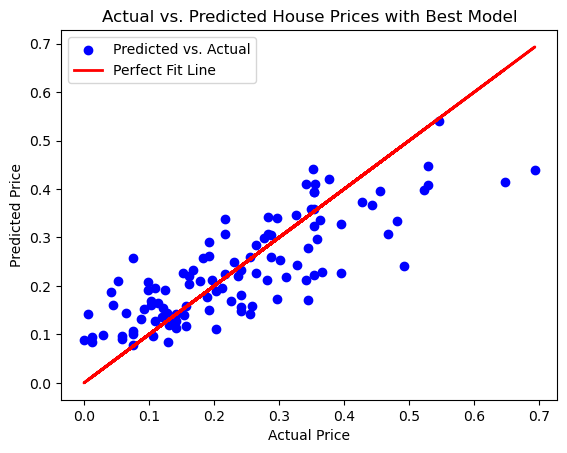

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Define the model
lr_model = LinearRegression()

# Define the parameter grid
param_grid = {
    'fit_intercept': [True, False]  # Hyperparameter to tune
}

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameter and the best model
best_lr_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best hyperparameters
print(f"Best Hyperparameters: {best_params}")

# Use the best model to predict
lr2_y_train_pred = best_lr_model.predict(X_train)
lr2_y_test_pred = best_lr_model.predict(X_test)

# Model Evaluation on Train Data
lr2_train_mae = mean_absolute_error(y_train, lr2_y_train_pred)
lr2_train_rmse = np.sqrt(mean_squared_error(y_train, lr2_y_train_pred))
lr2_train_r2 = r2_score(y_train, lr2_y_train_pred)

# Model Evaluation on Test Data
lr2_test_mae = mean_absolute_error(y_test, lr2_y_test_pred)
lr2_test_rmse = np.sqrt(mean_squared_error(y_test, lr2_y_test_pred))
lr2_test_r2 = r2_score(y_test, lr2_y_test_pred)

# Print Results
print(f"Train Data: MAE = {lr2_train_mae:.2f}, RMSE = {lr2_train_rmse:.2f}, R2 Score = {lr2_train_r2:.4f}")
print(f"Test Data: MAE = {lr2_test_mae:.2f}, RMSE = {lr2_test_rmse:.2f}, R2 Score = {lr2_test_r2:.4f}")

# 📊 Plot Real vs. Predicted Values
plt.scatter(y_test, lr2_y_test_pred, color='blue', label="Predicted vs. Actual")  
plt.plot(y_test, y_test, color='red', linewidth=2, label="Perfect Fit Line")  # Ideal 45-degree line

# Labels & Title
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted House Prices with Best Model")
plt.legend()
plt.show()


### Neural network model using activation function "Leaky Relu"

In [18]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import Adam

# Split the data into features (X) and target (y)
X = df.drop(columns=['price'])
y = df['price']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the Neural Network model
nn_model = keras.Sequential([
    keras.layers.Dense(64, activation='leaky_relu', input_shape=(X_train.shape[1],)),  # Input Layer
    keras.layers.Dense(32, activation='leaky_relu'),  # Hidden Layer 1
    keras.layers.Dense(16, activation='leaky_relu'),  # Hidden Layer 2
    keras.layers.Dense(1)  # Output Layer (No activation for regression)
])


optimizer = Adam(learning_rate=0.0005) 

# Compile the model
nn_model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Train the model
history = nn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16, verbose=1)

# Predictions
nn_y_train_pred = nn_model.predict(X_train)
nn_y_test_pred = nn_model.predict(X_test)

# Evaluate the Model
nn_train_mae = mean_absolute_error(y_train, nn_y_train_pred)
nn_test_mae = mean_absolute_error(y_test, nn_y_test_pred)

nn_train_rmse = np.sqrt(mean_squared_error(y_train, nn_y_train_pred))
nn_test_rmse = np.sqrt(mean_squared_error(y_test, nn_y_test_pred))

nn_train_r2 = r2_score(y_train, nn_y_train_pred)
nn_test_r2 = r2_score(y_test, nn_y_test_pred)

print(f"Train Data: MAE = {nn_train_mae:.4f}, RMSE = {nn_train_rmse:.4f}, R2 Score = {nn_train_r2:.4f}")
print(f"Test Data: MAE = {nn_test_mae:.4f}, RMSE = {nn_test_rmse:.4f}, R2 Score = {nn_test_r2:.4f}")

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.1578 - mae: 0.3234 - val_loss: 0.0324 - val_mae: 0.1309
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0210 - mae: 0.1063 - val_loss: 0.0185 - val_mae: 0.1059
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0118 - mae: 0.0816 - val_loss: 0.0152 - val_mae: 0.0958
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0103 - mae: 0.0752 - val_loss: 0.0125 - val_mae: 0.0857
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0079 - mae: 0.0656 - val_loss: 0.0113 - val_mae: 0.0808
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0081 - mae: 0.0678 - val_loss: 0.0100 - val_mae: 0.0762
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0064 - mae: 0.0620 - val_loss: 0.0094 - val_mae: 0.0740
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0059 - mae: 0.0594 - val_loss: 0.0091 - val_mae: 0.0725
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.

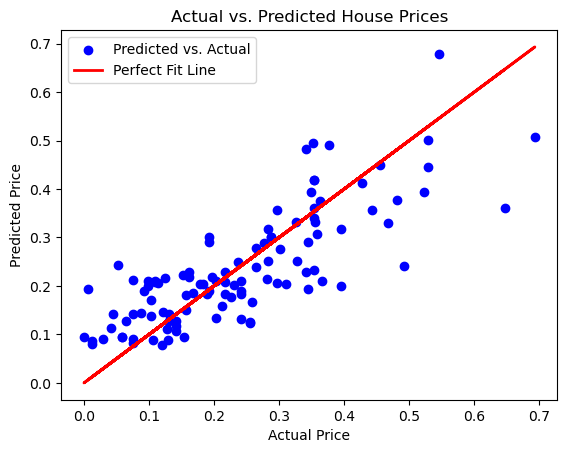

In [19]:
# 📊 Plot Real vs. Predicted Values
plt.scatter(y_test, nn_y_test_pred, color='blue', label="Predicted vs. Actual")  
plt.plot(y_test, y_test, color='red', linewidth=2, label="Perfect Fit Line")  # Ideal 45-degree line

# Labels & Title
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted House Prices")
plt.legend()
plt.show()

### Neural Network using drop out method to avoid over-fitting

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam

# Split the data into features (X) and target (y)
X = df.drop(columns=['price'])
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (recommended for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Neural Network model with Dropout
nn2_model = keras.Sequential([
    Dense(64, input_shape=(X_train.shape[1],)),  
    LeakyReLU(alpha=0.1),  # Leaky ReLU activation
    Dropout(0.2),  # Dropout to prevent overfitting
    
    Dense(32),
    LeakyReLU(alpha=0.1),
    Dropout(0.2),
    
    Dense(16),
    LeakyReLU(alpha=0.1),
    Dropout(0.2),
    
    Dense(1)  # Output layer (no activation for regression)
])

# Compile the model
optimizer = Adam(learning_rate=0.0005)
nn2_model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Train the model
history = nn2_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16, verbose=1)

# Predictions
nn2_y_train_pred = nn2_model.predict(X_train)
nn2_y_test_pred = nn2_model.predict(X_test)

# Evaluate the Model
nn2_train_mae = mean_absolute_error(y_train, nn2_y_train_pred)
nn2_test_mae = mean_absolute_error(y_test, nn2_y_test_pred)

nn2_train_rmse = np.sqrt(mean_squared_error(y_train, nn2_y_train_pred))
nn2_test_rmse = np.sqrt(mean_squared_error(y_test, nn2_y_test_pred))

nn2_train_r2 = r2_score(y_train, nn2_y_train_pred)
nn2_test_r2 = r2_score(y_test, nn2_y_test_pred)

# Print Model Performance
print(f"Train Data: MAE = {nn2_train_mae:.4f}, RMSE = {nn2_train_rmse:.4f}, R2 Score = {nn2_train_r2:.4f}")
print(f"Test Data: MAE = {nn2_test_mae:.4f}, RMSE = {nn2_test_rmse:.4f}, R2 Score = {nn2_test_r2:.4f}")


Epoch 1/100


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.3701 - mae: 0.4532 - val_loss: 0.0770 - val_mae: 0.2131
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1749 - mae: 0.3045 - val_loss: 0.0426 - val_mae: 0.1571
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1007 - mae: 0.2339 - val_loss: 0.0328 - val_mae: 0.1343
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0828 - mae: 0.2213 - val_loss: 0.0273 - val_mae: 0.1215
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0818 - mae: 0.2033 - val_loss: 0.0250 - val_mae: 0.1152
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0700 - mae: 0.1927 - val_loss: 0.0223 - val_mae: 0.1082
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0412 - mae: 0.1515 - val_loss: 0.0218 - val_mae: 0.1074
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0512 - mae: 0.1610 - val_loss: 0.0216 - val_mae: 0.1067
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0424 - mae: 0

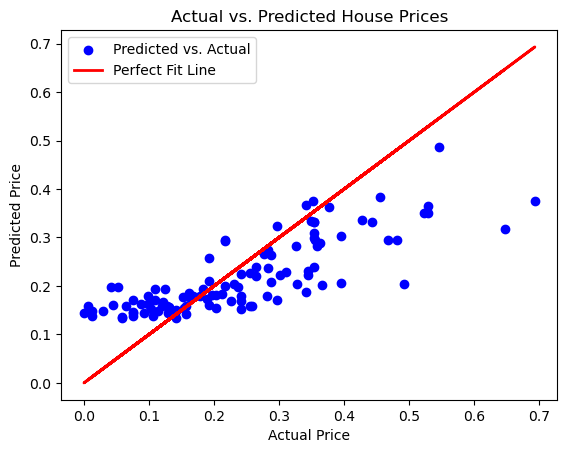

In [22]:
# 📊 Plot Real vs. Predicted Values
plt.scatter(y_test, nn2_y_test_pred, color='blue', label="Predicted vs. Actual")  
plt.plot(y_test, y_test, color='red', linewidth=2, label="Perfect Fit Line")  # Ideal 45-degree line

# Labels & Title
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted House Prices")
plt.legend()
plt.show()

### Comparing all model Evaluation matrices

In [29]:
# Performance metrics for each model
# Print Results
print("            EVALUATION REPORT\n")
print("Linear regression")
print(f"Train Data: MAE = {lr_train_mae:.2f}, RMSE = {lr_train_rmse:.2f}, R2 Score = {lr_train_r2:.4f}")
print(f"Test Data: MAE = {lr_test_mae:.2f}, RMSE = {lr_test_rmse:.2f}, R2 Score = {lr_test_r2:.4f}\n\n")

print("Linear regression after tuning")
print(f"Train Data: MAE = {lr2_train_mae:.2f}, RMSE = {lr2_train_rmse:.2f}, R2 Score = {lr2_train_r2:.4f}")
print(f"Test Data: MAE = {lr2_test_mae:.2f}, RMSE = {lr2_test_rmse:.2f}, R2 Score = {lr2_test_r2:.4f}")

print("Neural Network")
print(f"Train Data: MAE = {nn_train_mae:.4f}, RMSE = {nn_train_rmse:.4f}, R2 Score = {nn_train_r2:.4f}")
print(f"Test Data: MAE = {nn_test_mae:.4f}, RMSE = {nn_test_rmse:.4f}, R2 Score = {nn_test_r2:.4f}\n\n")

print("Drop-out Neural Network")
# Print Model Performance
print(f"Train Data: MAE = {nn2_train_mae:.4f}, RMSE = {nn2_train_rmse:.4f}, R2 Score = {nn2_train_r2:.4f}")
print(f"Test Data: MAE = {nn2_test_mae:.4f}, RMSE = {nn2_test_rmse:.4f}, R2 Score = {nn2_test_r2:.4f}")

            EVALUATION REPORT

Linear regression
Train Data: MAE = 0.05, RMSE = 0.06, R2 Score = 0.7035
Test Data: MAE = 0.06, RMSE = 0.08, R2 Score = 0.6695


Linear regression after tuning
Train Data: MAE = 0.05, RMSE = 0.06, R2 Score = 0.6953
Test Data: MAE = 0.07, RMSE = 0.09, R2 Score = 0.6513
Neural Network
Train Data: MAE = 0.0324, RMSE = 0.0431, R2 Score = 0.8594
Test Data: MAE = 0.0672, RMSE = 0.0870, R2 Score = 0.6362


Drop-out Neural Network
Train Data: MAE = 0.0507, RMSE = 0.0682, R2 Score = 0.6486
Test Data: MAE = 0.0731, RMSE = 0.0964, R2 Score = 0.5526


# **House Price Prediction Report**

## **1. Objective**
The goal of this project is to develop a machine learning model that can predict house prices based on various features such as location, square footage, and the number of bedrooms and bathrooms. The dataset, provided by **Datanomus Company**, consists of **545 records**, with **436 samples used for training**. Due to the small dataset size, overfitting was a major challenge.

---

## **2. Dataset Information**
- **Total Records:** 545  
- **Training Data:** 436  
- **Testing Data:** 109  
- **Features:** Various house attributes (categorical & numerical)  
- **Target Variable:** House price  

---

## **3. Models & Approach**
### **3.1 Linear Regression (Baseline Model)**
- Used **all independent features**.  
- Model exhibited **overfitting**, likely due to high variance.  

### **3.2 Hyperparameter Tuning for Linear Regression**
- Applied **hyperparameter tuning** to optimize the **Linear Regression** model.  
- **Grid Search** was used to find the best regularization parameters (e.g., `alpha`) and achieve better generalization.
  

### **3.3 Neural Network (Deep Learning Approach)**
- Implemented a **Neural Network with Leaky ReLU activation**.  
- Trained with **all independent features**.  
- Exhibited **significant overfitting**, mainly due to the **limited dataset size**.

### **3.4 Dropout Neural Network (Regularized Approach)**
- Applied **Dropout** in the neural network to help reduce overfitting.  
- **Random neurons were deactivated during training** to force the network to generalize better.
- While the dropout technique showed some improvement, the model still struggled with **overfitting due to limited data**.

### **Key Observations:**
- **Overfitting is a major issue** due to the **small dataset size**.  
- **Neural networks require more data** to generalize well, which wasn't available.  
- **Dropout Neural Network** helped reduce overfitting but still struggled due to limited data.  
- **Hyperparameter tuning in Linear Regression** improved performance but was still constrained by dataset size.
---

## **4. Next Steps & Recommendations**
🔹 **Data Collection:** Increase dataset size to improve model performance.  
🔹 **Regularization Techniques:** Apply **L1/L2 regularization** to reduce overfitting in the neural network.  
🔹 **Ensemble Learning:** Experiment with **Random Forest, XGBoost, or Gradient Boosting** for better performance on small datasets.  
🔹 **Data Augmentation:** Consider synthetic data generation techniques to enhance model training.  


🔹 **Model Evaluation:**  
Consider using cross-validation techniques to evaluate model performance more robustly and reduce variance in results. This is especially important when working with smaller datasets.
---

## **5. Conclusion**
This project highlights the challenges of building an accurate **house price prediction model with a small dataset**. While linear regression provided a baseline, **feature selection improved performance**, and **neural networks struggled due to data scarcity**. Future improvements should focus on **data expansion, regularization, and advanced ML techniques** to enhance generalization and model accuracy.

## **5. Conclusion**

This project highlights the **challenges and limitations** of building an accurate **house price prediction model** with a relatively small dataset. While **linear regression** served as a solid baseline, the model showed signs of **overfitting** due to high variance, which could not be fully mitigated by feature selection alone. The **neural network** approach, despite its potential, also faced significant challenges in terms of **generalization**, primarily due to the **insufficient dataset size**.

Neural networks, especially with **Leaky ReLU** activation and **Dropout layers**, demonstrated the importance of having a larger training set to prevent overfitting and improve the model's ability to generalize to unseen data.

For **future improvements**, the focus should be on:
- **Expanding the dataset** to reduce overfitting and improve model reliability.
- Implementing **advanced regularization techniques** like **L1/L2 regularization** and further improving **Dropout** strategies in neural networks.
- Leveraging **ensemble learning** techniques like **Random Forest**, **XGBoost**, or **Gradient Boosting** to capture complex relationships in the data and enhance model performance, especially in small dataset scenarios.
- Incorporating **hyperparameter tuning** and experimenting with more **advanced ML models** to further optimize the model and achieve better accuracy.

In conclusion, while this project successfully demonstrated the use of basic and advanced models, the challenges of **limited data** underline the importance of data collection, regularization, and model refinement. With improvements in these areas, the **accuracy and robustness** of the house price prediction model can be significantly enhanced.


---





In [ ]:
# Inverse transform to get original price values
# df['price_original'] = minmax.inverse_transform(df[['price_minmax']])